# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [1]:
import pandas as pd
df= pd.read_csv('homepage_actions.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [3]:
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [6]:
import seaborn as sns

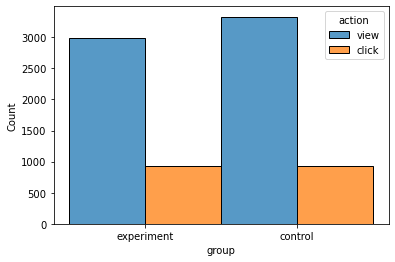

In [14]:
sns.histplot(data=df, x='group', hue = 'action', multiple='dodge' );

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [15]:
contingency_table = pd.crosstab(index=df["action"], columns=df["group"])
contingency_table

group,control,experiment
action,,
click,932,928
view,3332,2996


In [16]:
from scipy import stats

In [17]:
result = stats.contingency.chi2_contingency(contingency_table)
chi, p, dof, exp = result
result

(3.636160051233291,
 0.056537191086915774,
 1,
 array([[ 968.61748901,  891.38251099],
        [3295.38251099, 3032.61748901]]))

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [20]:
df['binary'] = [1 if df.action[row] == 'click' else 0 for row in range(df.shape[0])]

In [25]:
click_rate_ctrl = 932/(932+3332)
click_rate_ctrl

0.21857410881801126

In [27]:
expr_total = df[df.group=='experiment'].shape[0]
exp_clicks_expr = expr_total * click_rate_ctrl
exp_clicks_expr

857.6848030018762

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [29]:
import numpy as np
expr_clicks = df[df.group=='experiment'].binary.sum()
prob = click_rate_ctrl

var = expr_total*prob*(1-prob)
sd = np.sqrt(var)

num_sd = (expr_clicks - exp_clicks_expr)/ sd
num_sd

2.71607302278784

In [31]:
sd

25.888551746650283

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [30]:
stats.norm.sf(num_sd)

0.003303067275926571

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: Not even close.  I may have not used the right test

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.